In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from scipy.stats import zscore
import seaborn as sns

%matplotlib  inline

In [2]:
root_dir = "../data/"

In [3]:
def zscore(df):
    m = df.mean(axis=1)
    df = df.T - m
    df = df.T
    s = df.std(axis=1)
    df = df.T/s
    df = df.T
    # set to 0 not variable genes 
    zero_var_genes = s[s==0].index.values
    df.loc[zero_var_genes,:] = 0
    return df

def map_stage(x):
    if x in ['Stage I',"Stage IA","Stage IB","Stage IC"]:
        return 1
    elif x in ['Stage II',"Stage IIA","Stage IIB","Stage IIC"]:
        return 2
    elif x in ['Stage III',"Stage IIIA","Stage IIIB","Stage IIIC"]:
        return 3
    elif x in ['Stage IV',"Stage IVA","Stage IVB","Stage IVC"]:
        return 4
    else:
        return np.nan

In [4]:
pheno_file = root_dir+"/Xena_TCGA_PanCan/TCGA_phenotype_denseDataOnlyDownload.tsv.gz"
pheno_data = pd.read_csv(pheno_file, index_col=0, sep ="\t",compression="gzip")
pheno_data

,sample_type_id,sample_type,_primary_disease
sample,,,
TCGA-D3-A1QA-07,7.0,Additional Metastatic,skin cutaneous melanoma
TCGA-DE-A4MD-06,6.0,Metastatic,thyroid carcinoma
TCGA-J8-A3O2-06,6.0,Metastatic,thyroid carcinoma
TCGA-J8-A3YH-06,6.0,Metastatic,thyroid carcinoma
TCGA-EM-A2P1-06,6.0,Metastatic,thyroid carcinoma
...,...,...,...
TCGA-17-Z059-01,NaN,NaN,lung adenocarcinoma
TCGA-17-Z060-01,NaN,NaN,lung adenocarcinoma
TCGA-17-Z061-01,NaN,NaN,lung adenocarcinoma


In [5]:
pheno_data.loc[:,["sample_type","_primary_disease"]].groupby("sample_type").agg("count")

,_primary_disease
sample_type,
Additional - New Primary,11
Additional Metastatic,1
Metastatic,396
Primary Blood Derived Cancer - Peripheral Blood,200
Primary Tumor,10593
Recurrent Tumor,56
Solid Tissue Normal,1475


In [6]:
#pheno_data_n = pheno_data.loc[pheno_data["sample_type"]=="Solid Tissue Normal",:]
#pheno_data_n.loc[:,["sample_type","_primary_disease"]].groupby("_primary_disease").agg("count")

In [7]:
# tumors
pheno_data_t = pheno_data.loc[pheno_data["sample_type"]!="Solid Tissue Normal",:]
pheno_data_n = pheno_data.loc[pheno_data["sample_type"]=="Solid Tissue Normal",:]
# solid tumors
pheno_data_st = pheno_data_t.loc[pheno_data_t["sample_type"]!="Primary Blood Derived Cancer - Peripheral Blood",:]
pheno_data_st.loc[:,["sample_type","_primary_disease"]].groupby("_primary_disease").agg("count").sort_values(by="sample_type",ascending = False)

,sample_type
_primary_disease,
breast invasive carcinoma,1108
ovarian serous cystadenocarcinoma,611
glioblastoma multiforme,607
uterine corpus endometrioid carcinoma,548
kidney clear cell carcinoma,537
brain lower grade glioma,530
head & neck squamous cell carcinoma,530
lung adenocarcinoma,522
thyroid carcinoma,515


In [8]:
pheno_data_brca = pheno_data_st.loc[pheno_data_st["_primary_disease"]=="breast invasive carcinoma",:]
pheno_data_brca.loc[:,["sample_type","_primary_disease"]].groupby("sample_type").agg("count")

,_primary_disease
sample_type,
Metastatic,7
Primary Tumor,1101


In [9]:
pheno_file2 = root_dir+"/Xena_TCGA_PanCan/Survival_SupplementalTable_S1_20171025_xena_sp"

pheno_data2 = pd.read_csv(pheno_file2,sep = "\t",index_col=0)
pheno_data2["age"] = pheno_data2["age_at_initial_pathologic_diagnosis"]
pheno_data2["sex"] = 0
pheno_data2.loc[pheno_data2["gender"]=="FEMALE","sex"] = 1     

pheno_data2["stage"] = pheno_data2["ajcc_pathologic_tumor_stage"].apply(lambda x: map_stage(x))  

In [10]:
pheno_data2.columns#loc[:,['histological_grade','margin_status', 'residual_tumor',]]

Index(['_PATIENT', 'cancer type abbreviation',
       'age_at_initial_pathologic_diagnosis', 'gender', 'race',
       'ajcc_pathologic_tumor_stage', 'clinical_stage', 'histological_type',
       'histological_grade', 'initial_pathologic_dx_year', 'menopause_status',
       'birth_days_to', 'vital_status', 'tumor_status', 'last_contact_days_to',
       'death_days_to', 'cause_of_death', 'new_tumor_event_type',
       'new_tumor_event_site', 'new_tumor_event_site_other',
       'new_tumor_event_dx_days_to', 'treatment_outcome_first_course',
       'margin_status', 'residual_tumor', 'OS', 'OS.time', 'DSS', 'DSS.time',
       'DFI', 'DFI.time', 'PFI', 'PFI.time', 'Redaction', 'age', 'sex',
       'stage'],
      dtype='object')

In [11]:
#pheno_data2.loc[:,["gender","ajcc_pathologic_tumor_stage"]].groupby("ajcc_pathologic_tumor_stage").agg("count").sort_values(by="gender",ascending = False)

### TCGA-BRCA primary data

In [12]:
cols = ['age', 'stage',
        'OS', 'OS.time', 'DSS', 'DSS.time',
        'DFI', 'DFI.time', 'PFI', 'PFI.time']
# keep only primary breast tumors
anno_brca = pheno_data2.loc[list(set(pheno_data_brca.loc[pheno_data_brca["sample_type"]=="Primary Tumor",:].index).intersection(set(pheno_data2.index))),:]
# keep only females to match METABRIC
anno_brca = anno_brca.loc[anno_brca["gender"]=="FEMALE",cols]
for i in range(2,5):
    anno_brca["stage_"+str(i)] = 0
    anno_brca.loc[anno_brca["stage"]==i,"stage_"+str(i)] = 1
    anno_brca.loc[anno_brca["stage"].isna(),"stage_"+str(i)] = np.nan

anno_brca.head(3) #.loc[anno_brca["stage"].isna(),:]

,age,stage,OS,OS.time,DSS,DSS.time,DFI,DFI.time,PFI,PFI.time,stage_2,stage_3,stage_4
sample,,,,,,,,,,,,,
TCGA-AN-A0AS-01,70.0,3.0,0.0,10.0,0.0,10.0,0.0,10.0,0.0,10.0,0.0,1.0,0.0
TCGA-LL-A5YN-01,46.0,2.0,0.0,447.0,0.0,447.0,0.0,447.0,0.0,447.0,1.0,0.0,0.0
TCGA-AR-A0TR-01,68.0,2.0,1.0,160.0,NaN,160.0,0.0,160.0,0.0,160.0,1.0,0.0,0.0


In [13]:
# reading only brca columns
not_found_cols = ['TCGA-C8-A1HF-01', 'TCGA-AR-A0U1-01', 'TCGA-E2-A108-01', 'TCGA-BH-A0AY-01', 'TCGA-AC-A5EI-01', 'TCGA-C8-A9FZ-01']
print("not found columns:",len(not_found_cols))
brca_samples = [x for x in ["sample"]+list(anno_brca.index.values) if not x in not_found_cols]
exprs_brca = pd.read_csv(root_dir+"/Xena_TCGA_PanCan/tcga_RSEM_Hugo_norm_count.gz",
                    sep = "\t",index_col=0,usecols=brca_samples,compression="gzip")
exprs_brca.shape

not found columns: 6


(58581, 1079)

In [14]:
# drop zero variance genes
exprs_brca = exprs_brca.loc[exprs_brca.std(axis=1)>0,:]
exprs_brca.shape

(52635, 1079)

In [15]:
# these genes are necessary for PAM50, OncotypeDX and EndoPredict
add_to_tcga = ["BAG1", "DHCR7","TMEM45B", "GPR160"]
exprs_brca.loc[add_to_tcga,:].shape[0]

4

(38643, 1079)


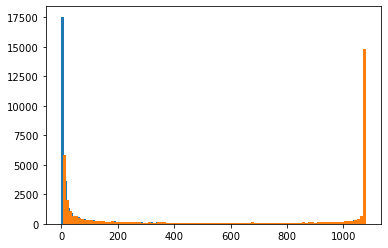

In [16]:
# drop genes with >=10 reads in <5 samples
min_log2_exprs = 2 # 
min_n_samples = 5
tmp = plt.hist(exprs_brca[exprs_brca>=min_log2_exprs].count(axis=1),bins=100)
exprs_brca = exprs_brca[exprs_brca[exprs_brca>=min_log2_exprs].count(axis=1) >=min_n_samples ]
print(exprs_brca.shape)
#plt.show()
tmp = plt.hist(exprs_brca[exprs_brca>=min_log2_exprs].count(axis=1),bins=100)


### Adding IHC data to TCGA and saving TCGA-BRCA annotation

In [17]:
brca_samples = list(sorted(exprs_brca.columns.values))
exprs_brca = exprs_brca.loc[:,brca_samples]
anno_brca = anno_brca.loc[brca_samples,:]


In [18]:
ihc_annot = pd.read_csv("/home/olya/SFU/Breast_cancer/Expression/Harmonized_final/TCGA.annotation_v2.t.tsv",sep = "\t",index_col=0)
shared_samples = list(sorted(set(anno_brca.index.values).intersection(set(ihc_annot.index.values))))
ihc_annot = ihc_annot.loc[[x for x in shared_samples if x in exprs_brca.columns],["ER","HER2","PR"]]
ihc_annot["TNBC"] = 0 
ihc_annot.loc[(ihc_annot["ER"]=="Negative")&(ihc_annot["PR"]=="Negative")&(ihc_annot["HER2"]=="Negative"),"TNBC"]=1
ihc_annot.columns = ["IHC_"+x for x in ihc_annot.columns]
anno_brca = pd.concat([anno_brca,ihc_annot],axis=1)
anno_brca.index.name = "sample_id"
anno_brca.head(3)

,age,stage,OS,OS.time,DSS,DSS.time,DFI,DFI.time,PFI,PFI.time,stage_2,stage_3,stage_4,IHC_ER,IHC_HER2,IHC_PR,IHC_TNBC
sample_id,,,,,,,,,,,,,,,,,
TCGA-3C-AAAU-01,55.0,NaN,0.0,4047.0,0.0,4047.0,1.0,1808.0,1.0,1808.0,NaN,NaN,NaN,Positive,Negative,Positive,0.0
TCGA-3C-AALI-01,50.0,2.0,0.0,4005.0,0.0,4005.0,0.0,4005.0,0.0,4005.0,1.0,0.0,0.0,Positive,Positive,Positive,0.0
TCGA-3C-AALJ-01,62.0,2.0,0.0,1474.0,0.0,1474.0,0.0,1474.0,0.0,1474.0,1.0,0.0,0.0,Positive,Indeterminate,Positive,0.0


In [19]:
anno_brca.to_csv(root_dir+"/preprocessed/TCGA-BRCA_1079.Xena_TCGA_PanCan.annotation_v6.tsv",sep ="\t")
print(exprs_brca.shape, anno_brca.shape)

(38643, 1079) (1079, 17)


## METABRIC 
* read METABRIC and keep the same gene ids

In [20]:
exprs_meta = pd.read_csv(root_dir+"/METABRIC/data_expression.txt",
                         sep = "\t",index_col=0)
exprs_meta = exprs_meta.iloc[:,1:]
exprs_meta 

,MB-0362,MB-0346,MB-0386,MB-0574,MB-0503,MB-0641,MB-0201,MB-0218,MB-0316,MB-0189,...,MB-6122,MB-6192,MB-4820,MB-5527,MB-5167,MB-5465,MB-5453,MB-5471,MB-5127,MB-4313
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
RERE,8.676978,9.653589,9.033589,8.814855,9.274265,9.286585,8.437347,8.569973,8.892102,8.922748,...,8.756024,8.804947,9.991215,9.595923,9.637249,8.131637,9.606915,9.049296,8.858622,8.415867
RNF165,6.075331,6.687887,5.910885,5.628740,5.908698,6.206729,6.095592,6.383530,5.773691,6.461321,...,7.101087,5.601472,7.103160,6.418987,6.203370,9.101942,7.427494,6.850000,6.550450,6.831722
CD049690,5.453928,5.454185,5.501577,5.471941,5.531743,5.372668,5.693519,5.401276,5.567946,5.410957,...,5.344674,5.364348,5.504866,5.277314,5.439207,5.423027,5.534115,5.339346,5.566071,5.541395
BC033982,4.994525,5.346010,5.247467,5.316523,5.244094,5.167365,5.189106,5.416517,5.339133,5.389980,...,5.300466,4.861101,4.980904,5.436855,5.346776,4.939292,5.062191,5.166765,5.140141,5.266802
PHF7,5.838270,5.600876,6.030718,5.849428,5.964661,5.783374,5.737572,5.923928,5.902223,5.536764,...,5.653481,5.922894,6.181493,5.992153,6.230316,5.644587,5.927409,6.117095,5.936371,7.408960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CC2D1A,6.353215,6.132355,6.366335,6.424048,6.214301,6.175542,6.003532,6.501156,6.617991,6.262962,...,6.111693,6.180190,6.026150,6.193474,6.437007,6.269748,7.088676,6.110477,6.316304,7.594277
CB986545,4.836483,5.316819,5.466419,5.193150,5.274600,5.299248,5.555575,5.241082,5.220612,5.234383,...,5.304611,4.970910,5.326566,5.234638,5.330035,5.337776,5.216496,5.427567,4.977467,5.690294
IGSF9,7.304643,7.933324,7.580336,6.903654,6.839417,6.326814,8.375567,6.534520,7.143399,7.149541,...,6.668100,6.580473,5.927223,6.166514,7.342794,7.288315,7.248336,7.596215,6.620605,7.437116


In [21]:
# missing values replaced with min. expression of this gene
nas = exprs_meta.isna().sum(axis=1)
print("{} missing values in {} genes".format(nas.sum(),nas[nas>0].shape[0]))
min_exprs = exprs_meta.loc[nas[nas>0].index,:].min(axis = 1)

print(exprs_meta.loc[min_exprs.index,:])
for gene in min_exprs.index:
    exprs_meta.loc[gene,:] = exprs_meta.loc[gene,:].fillna(min_exprs[gene])

print(exprs_meta.loc[min_exprs.index,:])
nas = exprs_meta.isna().sum(axis=1)
#exprs_meta.loc[nas[nas>0].index,:].min(axis = 1)
nas[nas>0]

10 missing values in 8 genes
               MB-0362   MB-0346    MB-0386    MB-0574   MB-0503   MB-0641  \
Hugo_Symbol                                                                  
TMPRSS7       5.526563  5.391789   5.488508   4.994387  5.371096  5.220928   
SLC25A19      6.693086  7.726429   6.428602   6.117585  6.869325  6.334975   
IDO1          5.539893  6.206812   5.888512   5.433380  5.583530  5.732530   
CSNK2A1       8.114931  8.493423   8.237654   8.365740  8.251723  8.000431   
BAMBI        10.678388  8.981804  11.781294  10.282797  7.797712  8.553760   
MRPL24        8.198578  8.027969   9.030172   9.183349  8.342043  8.005128   
AK127905      5.645121  5.733241   5.448650   5.256064  5.283516  5.508115   
FAM71A        5.049591  5.316790   5.461617   5.227130  5.027476  5.086662   

               MB-0201   MB-0218    MB-0316    MB-0189  ...   MB-6122  \
Hugo_Symbol                                             ...             
TMPRSS7       5.395449  5.600647   5.664347 

Series([], dtype: int64)

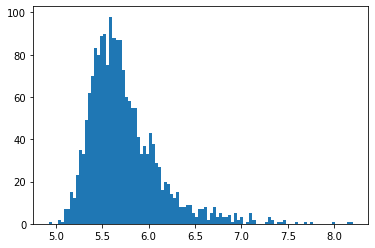

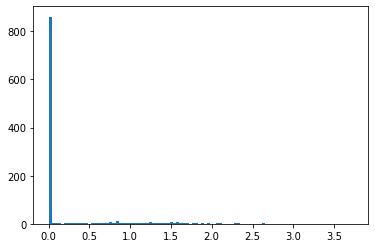

In [22]:
# example: prostate antigene
tmp = plt.hist(exprs_meta.loc['PCOTH',:],bins=100)
plt.show()
tmp = plt.hist(exprs_brca.loc['C1QTNF9B-AS1',:],bins=100)

In [23]:
# drop zero variance genes
exprs_meta = exprs_meta.loc[exprs_meta.std(axis=1)>0,:]
exprs_meta.shape

(24368, 1904)

## Map unmatched METABRIC genes via Entrez_Gene_Id
- matching METABRIC by EntrezGene id in TCGA
- not matched by Entrez match via TCGA "gene"

In [24]:
genes_meta = pd.read_csv(root_dir+"/METABRIC/data_expression.txt",
                         usecols=["Hugo_Symbol","Entrez_Gene_Id"],sep = "\t")
# in METABRIC Hugo ids are unique
genes_meta.shape[0],len(set(genes_meta["Entrez_Gene_Id"])),len(set(genes_meta["Hugo_Symbol"]))

(24368, 24099, 24368)

In [25]:
# In TCGA Entrez Id is unique
genes_tcga = pd.read_csv("../Xena_gene_info.tsv",sep ="\t",index_col=0)
genes_tcga =genes_tcga.loc[:,["entrezgene","symbol","gene","ENSG"]]
genes_tcga = genes_tcga.drop_duplicates(subset=["entrezgene","symbol","gene"])
genes_tcga.shape[0],len(set(genes_tcga["entrezgene"])),len(set(genes_tcga["gene"])),len(set(genes_tcga["symbol"]))

(58931, 58911, 58581, 39313)

In [27]:
t_exprs_genes  = set(exprs_brca.index).union(set(add_to_tcga))
print("symbol filed matching expression rownames:",genes_tcga.loc[genes_tcga["symbol"].isin(t_exprs_genes),:].shape[0])
print("gene filed matching expression rownames:",genes_tcga.loc[genes_tcga["gene"].isin(t_exprs_genes),:].shape[0])
genes_tcga = genes_tcga.loc[genes_tcga["gene"].isin(t_exprs_genes),:]

symbol filed matching expression rownames: 24161
gene filed matching expression rownames: 38809


In [28]:
# remove records with duplicated gene name
genes_tcga_unique= genes_tcga[~genes_tcga.duplicated("gene",keep=False)]
genes_tcga_dups= genes_tcga[genes_tcga.duplicated("gene",keep=False)]
s = set(genes_tcga_dups["gene"])
print("unique gene names gene names:",len(s), "duplicated records",genes_tcga_dups.shape[0])
genes_tcga_dups = genes_tcga_dups.dropna(subset = ["entrezgene","symbol"])
genes_tcga_dudedup = genes_tcga_dups[~genes_tcga_dups.duplicated("gene",keep=False)]
genes_tcga_dups = genes_tcga_dups[genes_tcga_dups.duplicated("gene",keep=False)]
print("still duplicated records",genes_tcga_dups.shape[0])
genes_tcga_dups = genes_tcga_dups.loc[genes_tcga_dups["symbol"]==genes_tcga_dups["gene"],:]
genes_tcga  = pd.concat([genes_tcga_unique,genes_tcga_dudedup,genes_tcga_dups],axis=0)

unique gene names gene names: 145 duplicated records 311
still duplicated records 40


In [29]:
gene_anno = []

In [30]:
shared_entrez = set(genes_tcga["entrezgene"].values).intersection(set(genes_meta["Entrez_Gene_Id"].values)).union(set(genes_tcga.loc[genes_tcga["gene"].isin(add_to_tcga),"entrezgene"].values))
print("shared unique entrez ids of genes expressed in TCGA:",len(shared_entrez))
t = genes_tcga.loc[genes_tcga["entrezgene"].isin(shared_entrez),:]
#t= genes_tcga.loc[genes_tcga["gene"].isin(t_genes),:]
t_dups = t.loc[t.loc[:,["entrezgene"]].duplicated(keep=False)]
t_not_dup = t.loc[~t.loc[:,["entrezgene"]].duplicated(keep=False)]
#t_dups = t_dups.dropna(subset = ["symbol"])
t_dups = t_dups.loc[t_dups["symbol"]==t_dups["gene"],:]
#t_dups = t_dups.drop_duplicates(subset=["gene"])
t  = pd.concat([t_not_dup,t_dups])
t[t.duplicated(subset = ["entrezgene"],keep=False)].sort_values(by = "entrezgene")

shared unique entrez ids of genes expressed in TCGA: 16995


,entrezgene,symbol,gene,ENSG


In [31]:
shared_names = set(genes_meta.loc[genes_meta["Entrez_Gene_Id"].isin(shared_entrez),"Hugo_Symbol"].values).intersection(set(genes_tcga["gene"].values)).union(set(add_to_tcga))
print("shared unique genes names:",len(shared_names))
m = genes_meta.loc[genes_meta["Entrez_Gene_Id"].isin(shared_entrez),:]
m_not_dup = m[~m.duplicated(subset = ["Entrez_Gene_Id"],keep=False)]
m_dup = m[m.duplicated(subset = ["Entrez_Gene_Id"],keep=False)].sort_values(by = "Entrez_Gene_Id")
m_dup.shape[0] #.loc[m_dup["Hugo_Symbol"].isin(shared_names),:]

shared unique genes names: 15684


423

In [32]:
t.set_index("entrezgene",inplace = True)

### since TCGA has few duplicated entrez ids, it is taken as reference

In [33]:
m = genes_meta.loc[genes_meta["Entrez_Gene_Id"].isin(shared_entrez),:]
m_dup = m[m.duplicated(subset = ["Entrez_Gene_Id"],keep=False)]
m_not_dup = m[~m.duplicated(subset = ["Entrez_Gene_Id"],keep=False)]
m_not_dup.set_index("Entrez_Gene_Id",inplace = True,drop=True)
#m_dup = m_dup.groupby("Entrez_Gene_Id").agg(lambda x: " ".join(x))
m_dup = m_dup.set_index("Entrez_Gene_Id",drop=True)
gene_anno = pd.concat([m_not_dup,m_dup],axis=0)
gene_anno.index.names = ["EntrezGene.ID"]
gene_anno["METABRIC_entrez"] = gene_anno.index
gene_anno["METABRIC_Hugo_Symbol"] = gene_anno["Hugo_Symbol"]
gene_anno["TCGA_entrez"] = gene_anno.index
gene_anno = gene_anno.drop("Hugo_Symbol",axis=1)
gene_anno["TCGA_gene"] = t.loc[gene_anno.index.values,"gene"]
gene_anno["TCGA_symbol"] = t.loc[gene_anno.index.values,"symbol"]
gene_anno["TCGA_ENSG"] = t.loc[gene_anno.index.values,"ENSG"]
gene_anno

,METABRIC_entrez,METABRIC_Hugo_Symbol,TCGA_entrez,TCGA_gene,TCGA_symbol,TCGA_ENSG
EntrezGene.ID,,,,,,
473.0,473.0,RERE,473.0,RERE,RERE,ENSG00000142599
494470.0,494470.0,RNF165,494470.0,RNF165,RNF165,ENSG00000141622
51533.0,51533.0,PHF7,51533.0,PHF7,PHF7,ENSG00000010318
1149.0,1149.0,CIDEA,1149.0,CIDEA,CIDEA,ENSG00000176194
167153.0,167153.0,PAPD4,167153.0,PAPD4,TENT2,ENSG00000164329
...,...,...,...,...,...,...
100506144.0,100506144.0,LOC100506144,100506144.0,ZMYM6NB,TMEM35B,ENSG00000243749
23049.0,23049.0,SMG1,23049.0,SMG1,SMG1,ENSG00000157106
4090.0,4090.0,SMAD5,4090.0,SMAD5,SMAD5,ENSG00000113658


In [34]:
gene_anno.loc[gene_anno["TCGA_gene"].isin(add_to_tcga),:]

,METABRIC_entrez,METABRIC_Hugo_Symbol,TCGA_entrez,TCGA_gene,TCGA_symbol,TCGA_ENSG
EntrezGene.ID,,,,,,


In [35]:
# map remaining METABRIC HUGO to remaining TCGA genes 
genes_meta_r =  genes_meta.loc[~genes_meta["Hugo_Symbol"].isin(set(gene_anno["METABRIC_Hugo_Symbol"].values)),:]
print("METABRIC not mapped",genes_meta_r.shape[0])
genes_tcga_r = genes_tcga.loc[~genes_tcga["entrezgene"].isin(set(gene_anno.index.values)),:]
print("TCGA not mapped",genes_tcga_r.shape[0])
shared_symbols = set(genes_meta_r["Hugo_Symbol"].values).intersection(set(genes_tcga_r["gene"].values))
print(len(shared_symbols))
m = genes_meta_r.loc[genes_meta_r["Hugo_Symbol"].isin(shared_symbols)].copy()
#print("duplicated HUGO:",m[m.duplicated(subset = ["Hugo_Symbol"],keep=False)].shape[0])
m.set_index("Hugo_Symbol",inplace=True,drop=True)
m.columns = ["METABRIC_entrez"]
m["METABRIC_Hugo_Symbol"] = m.index.values

t = genes_tcga_r.loc[genes_tcga_r["gene"].isin(shared_symbols),: ].drop_duplicates(subset =["gene"])
t.set_index("gene",inplace=True,drop=True)
t["TCGA_entrez"] = t["entrezgene"]
t["TCGA_gene"] = t.index.values
t["TCGA_symbol"] = t["symbol"]
t["TCGA_ENSG"] = t["ENSG"]
t = t.loc[:,["TCGA_entrez","TCGA_gene","TCGA_symbol","TCGA_ENSG"]]
df = pd.concat([m,t.loc[m.index.values,:]],axis=1)
df["EntrezGene.ID"] = df["TCGA_entrez"]
print("not mapped to Entrez in TCGA:",df.loc[df["EntrezGene.ID"].isna(),:].shape[0])
df.loc[df["EntrezGene.ID"].isna(),"EntrezGene.ID"] = df.loc[df["EntrezGene.ID"].isna(),"METABRIC_entrez"] 
df_no_entrez = df.loc[df["EntrezGene.ID"].isna(),:]
df = df.loc[~df["EntrezGene.ID"].isna(),:]
print("not mapped to Entrez in METABRIC:",df_no_entrez.shape[0])

df.set_index("EntrezGene.ID",drop=True,inplace=True)
df.head(2)

METABRIC not mapped 7158
TCGA not mapped 21626
170
not mapped to Entrez in TCGA: 129
not mapped to Entrez in METABRIC: 14


,METABRIC_entrez,METABRIC_Hugo_Symbol,TCGA_entrez,TCGA_gene,TCGA_symbol,TCGA_ENSG
EntrezGene.ID,,,,,,
65012.0,65012.0,SLC26A10,NaN,SLC26A10,SLC26A10,ENSG00000135502
3327.0,3327.0,HSP90AB3P,NaN,HSP90AB3P,HSP90AB3P,ENSG00000183199


In [36]:
gene_anno=pd.concat([gene_anno,df],axis=0)
gene_anno.shape[0]

17366

### Map remainig gene names to Entrez symbol

In [37]:
entrez = pd.read_csv(root_dir+"Homo_sapiens.gene_info.gz",
                     sep = "\t",compression="gzip")
entrez = entrez.loc[:,["Symbol","GeneID"]]#.drop_duplicates()
entrez = entrez.drop_duplicates()
print(entrez.shape[0],len(set(entrez["Symbol"].values)),len(set(entrez["GeneID"].values)))

75502 75348 75502


In [38]:
entrez_dict = entrez.loc[entrez["Symbol"].isin(df_no_entrez["TCGA_gene"]),:]
entrez_dict = entrez_dict.set_index("Symbol",drop=False).to_dict()["GeneID"]
found_genes = list(set(df_no_entrez.index).intersection(set(entrez_dict.keys())))
df_no_entrez.loc[found_genes ,"EntrezGene.ID"] = df_no_entrez.loc[found_genes ,"TCGA_gene"].apply(lambda x: entrez_dict[x]) 
df_no_entrez = df_no_entrez.dropna(subset = ["EntrezGene.ID"])
df_no_entrez.set_index("EntrezGene.ID",inplace = True,drop=True)
gene_anno=pd.concat([gene_anno,df_no_entrez],axis=0)
gene_anno.shape[0]

17379

In [39]:
# add genes necessary for PAM50 and other signatures
df = genes_tcga.loc[genes_tcga["gene"].isin(add_to_tcga),:]
df = df.set_index("entrezgene",drop=True,inplace = False)
df["EntrezGene.ID"] = df.index.values
df["TCGA_entrez"] = df.index.values
df["TCGA_gene"] = df["gene"]
df["TCGA_symbol"] =  df["symbol"]
df["TCGA_ENSG"] =  df["ENSG"]
df  = df.loc[:,["TCGA_entrez","TCGA_gene","TCGA_symbol","TCGA_ENSG","EntrezGene.ID"]]
gene_anno=pd.concat([gene_anno,df],axis=0)
gene_anno.shape[0]

17383

In [40]:
gene_anno.tail()

,METABRIC_entrez,METABRIC_Hugo_Symbol,TCGA_entrez,TCGA_gene,TCGA_symbol,TCGA_ENSG,EntrezGene.ID
441502.0,NaN,RPS26P11,NaN,RPS26P11,RPS26P11,ENSG00000196933,NaN
26996.0,NaN,NaN,26996.0,GPR160,GPR160,ENSG00000173890,26996.0
573.0,NaN,NaN,573.0,BAG1,BAG1,ENSG00000107262,573.0
1717.0,NaN,NaN,1717.0,DHCR7,DHCR7,ENSG00000172893,1717.0
120224.0,NaN,NaN,120224.0,TMEM45B,TMEM45B,ENSG00000151715,120224.0


### Add consensus gene name

In [41]:
entrez.set_index("GeneID",inplace = True,drop=False)

In [42]:
shared_entrez_ids = list(sorted(set(gene_anno.index).intersection(set(entrez.index))))
gene_anno.loc[:,"EntrezGene.ID"] = gene_anno.index.values
gene_anno.index.name =  "id"
gene_anno.loc[shared_entrez_ids,"Gene.Symbol"] = entrez.loc[shared_entrez_ids,"Symbol"]
gene_anno.loc[gene_anno["Gene.Symbol"].isna(),"Gene.Symbol"] = gene_anno.loc[gene_anno["Gene.Symbol"].isna(),"TCGA_gene"]
gene_anno  = gene_anno.drop_duplicates("Gene.Symbol")
gene_anno

,METABRIC_entrez,METABRIC_Hugo_Symbol,TCGA_entrez,TCGA_gene,TCGA_symbol,TCGA_ENSG,EntrezGene.ID,Gene.Symbol
id,,,,,,,,
473.0,473.0,RERE,473.0,RERE,RERE,ENSG00000142599,473.0,RERE
494470.0,494470.0,RNF165,494470.0,RNF165,RNF165,ENSG00000141622,494470.0,RNF165
51533.0,51533.0,PHF7,51533.0,PHF7,PHF7,ENSG00000010318,51533.0,PHF7
1149.0,1149.0,CIDEA,1149.0,CIDEA,CIDEA,ENSG00000176194,1149.0,CIDEA
167153.0,167153.0,PAPD4,167153.0,PAPD4,TENT2,ENSG00000164329,167153.0,TENT2
...,...,...,...,...,...,...,...,...
441502.0,NaN,RPS26P11,NaN,RPS26P11,RPS26P11,ENSG00000196933,441502.0,RPS26P11
26996.0,NaN,NaN,26996.0,GPR160,GPR160,ENSG00000173890,26996.0,GPR160
573.0,NaN,NaN,573.0,BAG1,BAG1,ENSG00000107262,573.0,BAG1


In [43]:
gene_anno.loc[gene_anno["Gene.Symbol"].duplicated(keep=False),:].sort_values("Gene.Symbol")

,METABRIC_entrez,METABRIC_Hugo_Symbol,TCGA_entrez,TCGA_gene,TCGA_symbol,TCGA_ENSG,EntrezGene.ID,Gene.Symbol
id,,,,,,,,


In [44]:
gene_anno.shape[0], len(set(gene_anno["Gene.Symbol"].values)), len(set(gene_anno.index.values))

(17162, 17162, 17162)

In [45]:
gene_anno = gene_anno.set_index("Gene.Symbol",drop=False,inplace=False)
gene_anno["probe"] = gene_anno["Gene.Symbol"].values  
gene_anno.index.name = "id"
#gene_anno = gene_anno.loc[,:]
gene_anno.to_csv(root_dir+"/preprocessed/gene_id_mapping.tsv",sep ="\t")
gene_anno.tail(5)

,METABRIC_entrez,METABRIC_Hugo_Symbol,TCGA_entrez,TCGA_gene,TCGA_symbol,TCGA_ENSG,EntrezGene.ID,Gene.Symbol,probe
id,,,,,,,,,
RPS26P11,NaN,RPS26P11,NaN,RPS26P11,RPS26P11,ENSG00000196933,441502.0,RPS26P11,RPS26P11
GPR160,NaN,NaN,26996.0,GPR160,GPR160,ENSG00000173890,26996.0,GPR160,GPR160
BAG1,NaN,NaN,573.0,BAG1,BAG1,ENSG00000107262,573.0,BAG1,BAG1
DHCR7,NaN,NaN,1717.0,DHCR7,DHCR7,ENSG00000172893,1717.0,DHCR7,DHCR7
TMEM45B,NaN,NaN,120224.0,TMEM45B,TMEM45B,ENSG00000151715,120224.0,TMEM45B,TMEM45B


# Map TCGA and METABRIC gene ids to "Gene.Symbol"
* "TCGA_gene" -> "Gene.Symbol"
* if multiple rows have the same Gene.Symbol, keep the one with the highest mean

In [46]:
# TCGA "gene" fields are unique
exprs_brca = exprs_brca.loc[gene_anno["TCGA_gene"].values,:]
#exprs_brca.iloc[:exprs_brca.shape[0]-len(add_to_tcga),:].index = gene_anno["Gene.Symbol"].values
exprs_brca.index = gene_anno["Gene.Symbol"].values
print(exprs_brca.shape[0], len(set(exprs_brca.index)),len(set(gene_anno["TCGA_gene"].values)))
exprs_brca.head(5)
exprs_brca.tail(5)

17162 17162 17162


,TCGA-3C-AAAU-01,TCGA-3C-AALI-01,TCGA-3C-AALJ-01,TCGA-3C-AALK-01,TCGA-4H-AAAK-01,TCGA-5L-AAT0-01,TCGA-5L-AAT1-01,TCGA-5T-A9QA-01,TCGA-A1-A0SB-01,TCGA-A1-A0SD-01,...,TCGA-UL-AAZ6-01,TCGA-UU-A93S-01,TCGA-V7-A7HQ-01,TCGA-W8-A86G-01,TCGA-WT-AB41-01,TCGA-WT-AB44-01,TCGA-XX-A899-01,TCGA-XX-A89A-01,TCGA-Z7-A8R5-01,TCGA-Z7-A8R6-01
RPS26P11,0.0000,1.0400,2.0534,1.0231,1.4484,0.0000,0.0000,1.1770,0.0000,0.0000,...,0.8345,1.1794,2.3999,0.8922,2.8716,2.0004,0.0000,1.6307,1.5749,0.0000
GPR160,11.2506,12.7804,9.7037,10.2047,10.3090,10.1383,10.9221,11.5628,7.6086,11.0938,...,10.9297,8.7121,10.0826,10.8495,10.5617,11.0612,10.4171,10.8042,9.2795,10.1863
BAG1,11.7268,10.4223,11.5367,11.5670,11.8643,11.2839,11.3807,13.5376,10.9377,13.6696,...,11.4226,12.5978,13.9918,11.4054,12.3042,11.7939,11.4566,10.9855,11.9878,11.3388
DHCR7,12.2964,11.7269,10.5089,11.4807,10.4964,9.6275,9.4750,13.9734,11.2620,11.4643,...,11.4394,13.3455,11.7601,10.5019,11.6085,10.9123,10.5834,12.1464,10.8546,10.2607
TMEM45B,2.9034,10.4724,3.2046,9.8426,9.3089,8.9954,10.7316,12.2882,6.1985,9.0465,...,8.6066,10.5615,10.2738,8.4009,5.2868,9.4249,8.9208,6.6880,8.4494,6.2273


In [47]:
# remove TCGA-exclusive genes from annotation
gene_anno = gene_anno.iloc[:gene_anno.shape[0]-len(add_to_tcga),:]
# METABRIC Hugo Symbol is unqiue
exprs_meta = exprs_meta.loc[gene_anno["METABRIC_Hugo_Symbol"],:]
exprs_meta.index  =  gene_anno["Gene.Symbol"]
print(exprs_meta.shape[0], len(set(exprs_meta.index)))

17158 17158


In [48]:
set(exprs_brca.index.values)==set(exprs_meta.index.values)

False

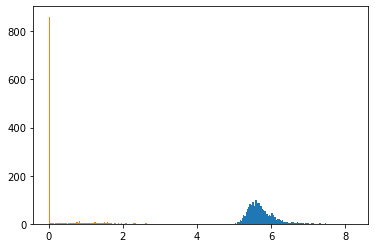

In [49]:
tmp = plt.hist(exprs_meta.loc["PCOTH",:].values,bins=100)
tmp = plt.hist(exprs_brca.loc["PCOTH",:].values,bins=100)

In [50]:
t_genes  = set(exprs_brca.index)
m_genes = set(exprs_meta.index)
shared_genes = list(sorted(gene_anno["Gene.Symbol"]))
print("TCGA:",len(t_genes),"METABRIC",len(m_genes),len(shared_genes))


TCGA: 17162 METABRIC 17158 17158


### Saving TCGA-BRCA subset to shared genes 

In [51]:
# TCGA-BRCA is already on log2-scale
print(np.all(anno_brca.index == exprs_brca.columns))
exprs_brca.index.name = "sample_id"
exprs_brca=exprs_brca.loc[shared_genes+add_to_tcga,anno_brca.index]
print(exprs_brca.shape)
exprs_brca.to_csv(root_dir+"/preprocessed/TCGA-BRCA_1079_17Kgenes.Xena_TCGA_PanCan.log2_exprs_v6.tsv",sep ="\t")

True
(17162, 1079)


In [53]:
exprs_brca.shape

(17162, 1079)

### METABRIC 

In [54]:
exprs_meta = exprs_meta.loc[shared_genes,:]
exprs_meta.shape

(17158, 1904)

In [57]:
# METABRIC annotation was preprocessed exactly as in DESMOND paper 
anno_meta = pd.read_csv(root_dir+"METABRIC/METABRIC.annotation_v3.t.tsv",sep = "\t",index_col=0)

anno_meta["OS.time"] = anno_meta["OS"]
anno_meta["OS"] = np.nan
anno_meta.loc[anno_meta["OS_status"]=="LIVING","OS"] =0
anno_meta.loc[anno_meta["OS_status"]=="DECEASED","OS"]=1

for i in range(2,5):
    anno_meta["stage_"+str(i)] = 0
    anno_meta.loc[anno_meta["stage"]==i,"stage_"+str(i)] = 1
    anno_meta.loc[anno_meta["stage"].isna(),"stage_"+str(i)] = np.nan
    
for i in range(2,4):
    anno_meta["grade_"+str(i)] = 0
    anno_meta.loc[anno_meta["grade"]==i,"grade_"+str(i)] = 1
    anno_meta.loc[anno_meta["grade"].isna(),"grade_"+str(i)] = np.nan

    
cols = ["age","stage","mol_subt","OS","OS.time","grade","stage_2","stage_3","stage_4","grade_2","grade_3"]
samples_meta = list(sorted(set(anno_meta.index).intersection(set(exprs_meta.columns))))

anno_meta = anno_meta.loc[samples_meta ,cols+["ER","HER2","PR"]]
ihc_annot = anno_meta.loc[samples_meta,["ER","HER2","PR"]]
ihc_annot["TNBC"] = 0 
ihc_annot.loc[(ihc_annot["ER"]=="Negative")&(ihc_annot["PR"]=="Negative")&(ihc_annot["HER2"]=="Negative"),"TNBC"]=1
ihc_annot.columns = ["IHC_"+x for x in ihc_annot.columns]
anno_meta = pd.concat([anno_meta.loc[:,cols],ihc_annot],axis=1)


anno_meta.head(3)

,age,stage,mol_subt,OS,OS.time,grade,stage_2,stage_3,stage_4,grade_2,grade_3,IHC_ER,IHC_HER2,IHC_PR,IHC_TNBC
MB-0000,75.65,2.0,claudin-low,0.0,140.500000,3.0,1.0,0.0,0.0,0.0,1.0,Positive,Negative,Negative,0
MB-0002,43.19,1.0,LumA,0.0,84.633333,3.0,0.0,0.0,0.0,0.0,1.0,Positive,Negative,Positive,0
MB-0005,48.87,2.0,LumB,1.0,163.100000,2.0,1.0,0.0,0.0,1.0,0.0,Positive,Negative,Positive,0


### Saving METABRIC annotation

In [59]:
anno_meta.to_csv(root_dir+"/preprocessed/METABRIC_1904.annotation_v6.tsv",sep ="\t")


### Saving METABRIC expression

In [60]:
exprs_meta = exprs_meta.loc[:,samples_meta]
exprs_meta.index.name = "sample_id"
exprs_meta.to_csv(root_dir+"/preprocessed/METABRIC_1904_17Kgenes.log2_exprs_v6.tsv",sep ="\t")

In [61]:
exprs_meta

,MB-0000,MB-0002,MB-0005,MB-0006,MB-0008,MB-0010,MB-0014,MB-0022,MB-0028,MB-0035,...,MB-7289,MB-7291,MB-7292,MB-7293,MB-7294,MB-7295,MB-7296,MB-7297,MB-7298,MB-7299
sample_id,,,,,,,,,,,,,,,,,,,,,
A1BG,5.369883,5.414432,5.527208,5.154137,5.436433,5.563255,5.300446,5.500513,5.427331,5.348858,...,5.379413,5.342927,5.347641,5.297796,5.242133,5.468843,5.403878,5.563178,5.527208,5.334672
A1CF,5.464824,5.275869,5.453274,5.300752,5.193205,5.089529,5.517943,5.445519,5.257856,5.161045,...,5.553780,5.231921,5.341183,5.611322,5.464606,5.563439,5.266678,5.490695,5.265128,5.380317
A2M,9.840336,8.316607,9.924913,11.313047,9.828450,8.961680,10.675799,11.515297,8.331443,8.799081,...,10.255849,9.407841,9.440387,10.125587,8.481749,10.049152,9.024746,9.005243,9.328827,9.579671
A3GALT2,4.959595,5.366424,5.477048,5.083991,5.053027,5.126254,5.343567,5.222329,5.154873,5.179089,...,5.111947,5.324476,5.166196,4.967659,5.034484,5.131390,5.324591,5.491544,5.341152,5.076773
A4GALT,6.651367,6.644259,6.243935,6.223461,6.056257,5.664652,6.162889,5.917693,6.632423,5.493569,...,6.496993,5.953892,6.373700,6.569943,6.773738,6.684053,6.440180,6.208530,7.011598,5.968554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,5.165483,5.357121,5.094948,5.359467,5.357324,5.347791,5.446103,5.191658,5.221757,5.612442,...,5.200841,5.285272,5.272707,5.311290,5.312055,5.465722,5.226580,5.271740,5.119650,5.256325
ZYG11B,9.003693,8.756802,9.156367,9.011042,8.414243,8.601931,9.340103,9.287225,8.896718,9.167392,...,8.526060,8.285482,8.170096,8.535214,8.674006,8.537321,8.063599,8.336047,8.472290,9.005537
ZYX,9.197090,8.870436,8.921823,8.507177,8.357856,8.568362,7.232827,8.070962,7.466346,9.296027,...,9.480149,8.995663,9.209460,9.056939,8.089006,9.226295,8.411928,8.440728,8.491460,9.035234


## Z-score transform expressions
* genes are centered to 0 mean and scaled to std 1

In [62]:
exprs_brca = pd.read_csv(root_dir+"/preprocessed/TCGA-BRCA_1079_17Kgenes.Xena_TCGA_PanCan.log2_exprs_v6.tsv",sep ="\t",index_col=0)
exprs_brca

,TCGA-3C-AAAU-01,TCGA-3C-AALI-01,TCGA-3C-AALJ-01,TCGA-3C-AALK-01,TCGA-4H-AAAK-01,TCGA-5L-AAT0-01,TCGA-5L-AAT1-01,TCGA-5T-A9QA-01,TCGA-A1-A0SB-01,TCGA-A1-A0SD-01,...,TCGA-UL-AAZ6-01,TCGA-UU-A93S-01,TCGA-V7-A7HQ-01,TCGA-W8-A86G-01,TCGA-WT-AB41-01,TCGA-WT-AB44-01,TCGA-XX-A899-01,TCGA-XX-A89A-01,TCGA-Z7-A8R5-01,TCGA-Z7-A8R6-01
sample_id,,,,,,,,,,,,,,,,,,,,,
A1BG,7.9692,8.6285,9.3174,8.2231,8.6735,8.1839,8.1357,8.8813,6.0604,7.9121,...,6.0794,8.9130,10.8452,9.5051,7.4355,9.3355,8.3266,8.4920,9.3561,8.6151
A1CF,0.0000,3.3945,2.3532,1.2657,1.2562,0.0000,1.1299,4.6949,0.0000,1.4103,...,3.3350,0.0000,0.0000,0.8247,0.0000,1.7908,1.2072,4.0622,0.0000,1.1138
A2M,13.3261,13.7408,13.7631,14.2302,13.9882,14.2441,14.4970,12.2975,15.7597,15.3444,...,13.0353,12.4118,13.9012,14.9091,13.9183,13.0583,15.0942,14.8341,15.7870,13.6282
A3GALT2,0.0000,0.0000,1.2448,0.7674,0.7608,0.0000,0.0000,0.0000,0.8047,0.6347,...,0.0000,0.0000,0.0000,0.0000,0.0000,1.1570,0.0000,0.0000,0.0000,1.7348
A4GALT,6.9353,8.1574,9.7843,9.7632,9.1256,9.1690,8.6102,9.2972,9.1738,9.3179,...,9.8617,6.5870,11.3630,8.8353,11.6304,9.0957,9.7007,9.9895,9.4269,10.3296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZZZ3,11.2516,9.7164,9.9067,10.5058,10.7496,10.9280,10.0053,9.6757,11.3928,11.1594,...,9.7169,9.4786,9.7517,10.7921,9.2918,9.6970,10.4635,10.8452,10.5648,9.8484
BAG1,11.7268,10.4223,11.5367,11.5670,11.8643,11.2839,11.3807,13.5376,10.9377,13.6696,...,11.4226,12.5978,13.9918,11.4054,12.3042,11.7939,11.4566,10.9855,11.9878,11.3388
DHCR7,12.2964,11.7269,10.5089,11.4807,10.4964,9.6275,9.4750,13.9734,11.2620,11.4643,...,11.4394,13.3455,11.7601,10.5019,11.6085,10.9123,10.5834,12.1464,10.8546,10.2607


In [63]:
exprs_brca_z = zscore(exprs_brca)
exprs_brca_z.head(3)

,TCGA-3C-AAAU-01,TCGA-3C-AALI-01,TCGA-3C-AALJ-01,TCGA-3C-AALK-01,TCGA-4H-AAAK-01,TCGA-5L-AAT0-01,TCGA-5L-AAT1-01,TCGA-5T-A9QA-01,TCGA-A1-A0SB-01,TCGA-A1-A0SD-01,...,TCGA-UL-AAZ6-01,TCGA-UU-A93S-01,TCGA-V7-A7HQ-01,TCGA-W8-A86G-01,TCGA-WT-AB41-01,TCGA-WT-AB44-01,TCGA-XX-A899-01,TCGA-XX-A89A-01,TCGA-Z7-A8R5-01,TCGA-Z7-A8R6-01
sample_id,,,,,,,,,,,,,,,,,,,,,
A1BG,0.171944,0.730008,1.313127,0.386858,0.768099,0.353677,0.312878,0.943991,-1.443757,0.123612,...,-1.427675,0.970823,2.606332,1.472006,-0.279805,1.328448,0.474465,0.614468,1.345885,0.718666
A1CF,-0.814925,2.386838,1.404662,0.378910,0.369949,-0.814925,0.250820,3.613402,-0.814925,0.515299,...,2.330716,-0.814925,-0.814925,-0.037051,-0.814925,0.874195,0.323731,3.016626,-0.814925,0.235634
A2M,-0.946474,-0.532145,-0.509865,-0.043182,-0.284966,-0.029295,0.223379,-1.974155,1.484951,1.070022,...,-1.237015,-1.859957,-0.371888,0.635111,-0.354803,-1.214035,0.820046,0.560178,1.512227,-0.644644


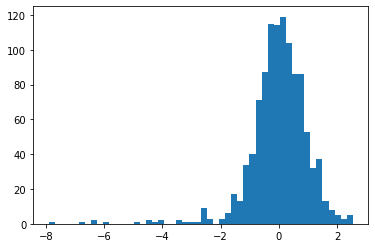

In [64]:
exprs_brca_z.to_csv(root_dir+"/preprocessed_z/TCGA-BRCA_1079_17Kgenes.Xena_TCGA_PanCan.log2_exprs_z_v6.tsv",sep ="\t")
tmp = plt.hist(exprs_brca_z.loc["CLDN7",:],bins = 50)

In [65]:
exprs_meta = pd.read_csv(root_dir+"/preprocessed/METABRIC_1904_17Kgenes.log2_exprs_v6.tsv",sep ="\t",index_col=0)
exprs_meta.head(3)

,MB-0000,MB-0002,MB-0005,MB-0006,MB-0008,MB-0010,MB-0014,MB-0022,MB-0028,MB-0035,...,MB-7289,MB-7291,MB-7292,MB-7293,MB-7294,MB-7295,MB-7296,MB-7297,MB-7298,MB-7299
sample_id,,,,,,,,,,,,,,,,,,,,,
A1BG,5.369883,5.414432,5.527208,5.154137,5.436433,5.563255,5.300446,5.500513,5.427331,5.348858,...,5.379413,5.342927,5.347641,5.297796,5.242133,5.468843,5.403878,5.563178,5.527208,5.334672
A1CF,5.464824,5.275869,5.453274,5.300752,5.193205,5.089529,5.517943,5.445519,5.257856,5.161045,...,5.553780,5.231921,5.341183,5.611322,5.464606,5.563439,5.266678,5.490695,5.265128,5.380317
A2M,9.840336,8.316607,9.924913,11.313047,9.828450,8.961680,10.675799,11.515297,8.331443,8.799081,...,10.255849,9.407841,9.440387,10.125587,8.481749,10.049152,9.024746,9.005243,9.328827,9.579671


In [66]:
exprs_meta_z = zscore(exprs_meta)
exprs_meta_z.head(3)

,MB-0000,MB-0002,MB-0005,MB-0006,MB-0008,MB-0010,MB-0014,MB-0022,MB-0028,MB-0035,...,MB-7289,MB-7291,MB-7292,MB-7293,MB-7294,MB-7295,MB-7296,MB-7297,MB-7298,MB-7299
sample_id,,,,,,,,,,,,,,,,,,,,,
A1BG,-0.611766,-0.255241,0.647304,-2.338381,-0.079170,0.935791,-1.167469,0.433668,-0.152008,-0.780027,...,-0.535495,-0.827494,-0.789770,-1.188676,-1.634146,0.180213,-0.339702,0.935177,0.647304,-0.893560
A1CF,0.479628,-0.588140,0.414357,-0.447527,-1.055264,-1.641127,0.779797,0.370537,-0.689931,-1.236998,...,0.982307,-0.836483,-0.219058,1.307477,0.478394,1.036891,-0.640079,0.625823,-0.648834,0.002088
A2M,0.841140,-0.844481,0.934702,2.470322,0.827991,-0.130871,1.765368,2.694060,-0.828069,-0.310746,...,1.300800,0.362692,0.398697,1.156698,-0.661793,1.072142,-0.061105,-0.082680,0.275284,0.552779


In [67]:
exprs_meta_z.to_csv(root_dir+"/preprocessed_z/METABRIC_1904_17Kgenes.log2_exprs_z_v6.tsv",sep ="\t")

In [68]:
#import seaborn as sns
sd_tcga = exprs_brca.std(axis=1)
sd_meta = exprs_meta.std(axis=1)
stats = pd.DataFrame.from_dict({"T_sd":sd_tcga,"M_sd":sd_meta})
#sns.scatterplot(data=stats,x="T_sd",y="M_sd")
stats["T_m"] = exprs_brca.mean(axis=1)
stats["M_m"] = exprs_meta.mean(axis=1)

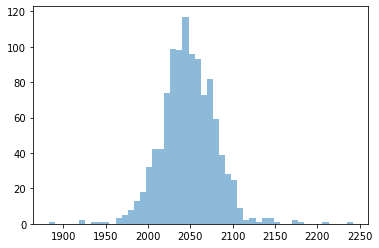

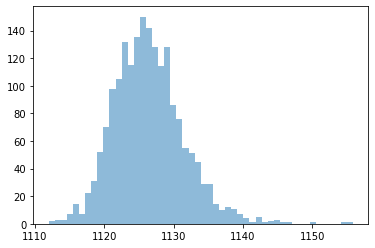

In [69]:
stats = stats.sort_values(by="T_sd")
stats["T_sd_rank"] = np.arange(0,stats.shape[0])
stats = stats.sort_values(by="M_sd")
stats["M_sd_rank"] = np.arange(0,stats.shape[0])
stats["sd_rank_sum"] = stats["T_sd_rank"] + stats["M_sd_rank"]
df = stats.sort_values(by="sd_rank_sum")
sele_genes = df.loc[df["T_m"]>5,:].head(200).index.values
tmp = plt.hist(exprs_brca.loc[sele_genes,:].sum(),bins = 50,alpha =0.5)
plt.show()
tmp = plt.hist(exprs_meta.loc[sele_genes,:].sum(),bins = 50,alpha =0.5)

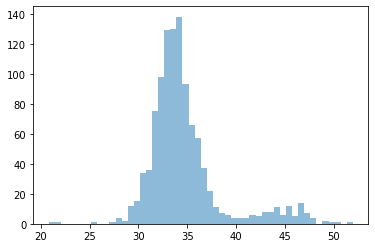

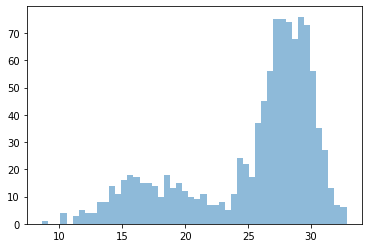

<AxesSubplot:xlabel='HER2', ylabel='ESR1'>

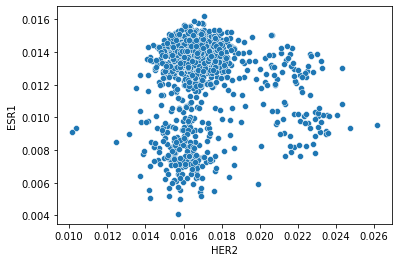

In [70]:
h = exprs_brca.loc[["ERBB2","GRB7","MIEN1"],:].sum()
a = exprs_brca.loc[["AURKA","MKI67"],:].sum()
anti_a = exprs_brca.loc[["FRY","GNG12","TNS2","FMOD"],:].sum()
e = exprs_brca.loc[["ESR1","CA12"],:].sum()
r = exprs_brca.loc[sele_genes,:].sum()
tmp = plt.hist(h,bins =50,alpha=0.5)
plt.show()
tmp = plt.hist(e,bins =50,alpha=0.5)
plt.show()
df = pd.DataFrame.from_dict({"HER2":h/r,"ESR1":e/r,"AURKA":a/r})
sns.scatterplot(data=df, x="HER2",y="ESR1")

# All cancer types

not expressed genes:

* less then 10 samples
* with log2-expression >= 4 - this corresponds to 2^4-1=15 normalized counts 

In [59]:
min_log_exprs = 5
min_frac_samples = 0.01

In [13]:
cols = ['age','sex', 'stage',"cancer_type",
        'OS', 'OS.time', 'DSS', 'DSS.time',
        'DFI', 'DFI.time', 'PFI', 'PFI.time']

pheno_data2 = pd.read_csv(pheno_file2,sep = "\t",index_col=0)
pheno_data2["age"] = pheno_data2["age_at_initial_pathologic_diagnosis"]
pheno_data2["sex"] = 0
pheno_data2["cancer_type"] = pheno_data2["cancer type abbreviation"]
pheno_data2.loc[pheno_data2["gender"]=="FEMALE","sex"] = 1     

pheno_data2["stage"] = pheno_data2["ajcc_pathologic_tumor_stage"].apply(lambda x: map_stage(x))  

for i in range(2,5):
    pheno_data2["stage_"+str(i)] = 0
    pheno_data2.loc[pheno_data2["stage"]==i,"stage_"+str(i)] = 1
    pheno_data2.loc[pheno_data2["stage"].isna(),"stage_"+str(i)] = np.nan

In [14]:
shared_samples = list(sorted(set(pheno_data.index.values).intersection(set(pheno_data2.index.values))))
print(len(shared_samples))
pheno_data =  pheno_data.loc[shared_samples,:]
pheno_data2 =  pheno_data2.loc[shared_samples,:]

12591


In [15]:
# tumors and normals
pheno_data_t = pheno_data.loc[pheno_data["sample_type"]!="Solid Tissue Normal",:]
pheno_data_n = pheno_data.loc[pheno_data["sample_type"]=="Solid Tissue Normal",:]
pheno_data_st = pheno_data_t.loc[pheno_data_t["sample_type"]!="Primary Blood Derived Cancer - Peripheral Blood",:]

tumor_counts = pheno_data_st.loc[:,["sample_type","_primary_disease"]].groupby("_primary_disease").agg("count").sort_values(by="sample_type",ascending = False)
normal_counts = pheno_data_n.loc[:,["sample_type","_primary_disease"]].groupby("_primary_disease").agg("count")
sample_counts = pd.concat([tumor_counts, normal_counts],axis=1)
sample_counts.columns = ["T","N"]
sele_cancers = ["breast invasive carcinoma","ovarian serous cystadenocarcinoma",
                "prostate adenocarcinoma", "stomach adenocarcinoma",
                "colon adenocarcinoma","rectum adenocarcinoma",
                "kidney clear cell carcinoma", "pancreatic adenocarcinoma",
                "lung adenocarcinoma","lung squamous cell carcinoma"]
pheno_data_pancan = pheno_data_st.loc[pheno_data_st["_primary_disease"].isin(sele_cancers),:]#
samples_pancan = pheno_data_pancan.index.values

print(len(samples_pancan))
anno_pancan = pheno_data2.loc[samples_pancan,:]

anno_pancan.loc[anno_pancan["stage"].isna(),"stage"] = anno_pancan["clinical_stage"].apply(lambda x: map_stage(x)) 

anno_pancan = anno_pancan.loc[:,cols]

for i in range(2,5):
    anno_pancan["stage_"+str(i)] = 0
    anno_pancan.loc[anno_pancan["stage"]==i,"stage_"+str(i)] = 1
    anno_pancan.loc[anno_pancan["stage"].isna(),"stage_"+str(i)] = np.nan



print("cancer types:",anno_pancan.loc[:,["age","cancer_type"]].groupby(["cancer_type"]).agg("count").index.values)

# with stage
anno_pancan.loc[:,["stage","cancer_type"]].groupby(["cancer_type"]).agg("count")
# with sex
anno_pancan.loc[:,["age","cancer_type"]].groupby(["cancer_type"]).agg("count")
anno_pancan

5021
cancer types: ['BRCA' 'COAD' 'KIRC' 'LUAD' 'LUSC' 'OV' 'PAAD' 'PRAD' 'READ' 'STAD']


,age,sex,stage,cancer_type,OS,OS.time,DSS,DSS.time,DFI,DFI.time,PFI,PFI.time,stage_2,stage_3,stage_4
sample,,,,,,,,,,,,,,,
TCGA-04-1331-01,78.0,1,3.0,OV,1.0,1336.0,1.0,1336.0,1.0,459.0,1.0,459.0,0.0,1.0,0.0
TCGA-04-1332-01,70.0,1,3.0,OV,1.0,1247.0,1.0,1247.0,NaN,NaN,1.0,393.0,0.0,1.0,0.0
TCGA-04-1335-01,60.0,1,1.0,OV,1.0,55.0,1.0,55.0,NaN,NaN,1.0,55.0,0.0,0.0,0.0
TCGA-04-1336-01,55.0,1,3.0,OV,0.0,1495.0,0.0,1495.0,0.0,1495.0,0.0,1495.0,0.0,1.0,0.0
TCGA-04-1337-01,78.0,1,3.0,OV,1.0,61.0,1.0,61.0,NaN,NaN,1.0,61.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-ZG-A9MC-01,69.0,0,NaN,PRAD,0.0,455.0,0.0,455.0,NaN,NaN,0.0,455.0,NaN,NaN,NaN
TCGA-ZG-A9N3-01,73.0,0,NaN,PRAD,0.0,349.0,0.0,349.0,NaN,NaN,0.0,349.0,NaN,NaN,NaN
TCGA-ZG-A9ND-01,55.0,0,NaN,PRAD,0.0,410.0,0.0,410.0,0.0,410.0,0.0,410.0,NaN,NaN,NaN


## Gene expressions


In [16]:
samples_with_exprs = pd.read_csv(root_dir+"/Xena_TCGA_PanCan/tcga_RSEM_Hugo_norm_count.gz",
                    sep = "\t",index_col=0,nrows=0).columns.values
samples_with_exprs = list(sorted(set(samples_with_exprs).intersection(set(anno_pancan.index.values))))
anno_pancan = anno_pancan.loc[samples_with_exprs,:]
anno_pancan.to_csv("preprocessed/PanCan_5K.annotation.tsv",sep ="\t")
print(len(samples_with_exprs))

4538


In [17]:
# float16 to save memory - valid for log-transformed data
#dtype_dict = dict(zip(samples_with_exprs,['float16']*len(samples_with_exprs)))
#print("to save memory, uses float16:",np.finfo('float16').min,np.finfo('float16').max,file = sys.stderr)
exprs = pd.read_csv(root_dir+"/Xena_TCGA_PanCan/tcga_RSEM_Hugo_norm_count.gz",
                    sep = "\t",index_col=0,usecols=["sample"]+samples_with_exprs) # dtype=dtype_dict
exprs.shape

(58581, 4538)

In [18]:
exprs.head(2)

,TCGA-44-6778-01,TCGA-F4-6854-01,TCGA-C8-A1HL-01,TCGA-EW-A2FS-01,TCGA-05-4420-01,TCGA-BR-A4J6-01,TCGA-KK-A6E4-01,TCGA-IN-7808-01,TCGA-BR-A4QL-01,TCGA-CH-5751-01,...,TCGA-A2-A0YK-01,TCGA-18-3414-01,TCGA-13-1481-01,TCGA-A8-A09K-01,TCGA-61-1907-01,TCGA-IB-7885-01,TCGA-B6-A0IA-01,TCGA-VQ-AA6F-01,TCGA-BR-8588-01,TCGA-24-2254-01
sample,,,,,,,,,,,,,,,,,,,,,
CTD-2588J6.1,0.0,0.0,0.0,0.0,0.9652,1.1172,0.0,3.0766,1.5756,0.0,...,1.1328,0.0,0.6718,0.0,0.0,0.0,0.0,1.1745,0.0,0.0
RP11-433M22.1,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0,...,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0


In [19]:
exprs.memory_usage().sum()/1024/1024

2028.6495895385742

In [20]:
#
exprs.max().max(),exprs.min().min()

23.8292

In [21]:
# negative values
exprs[exprs<0].count().sum()

0

In [22]:
# Nan
exprs.isna().sum().sum()
#exprs = exprs.fillna(0)

0

In [28]:
# infs
exprs[exprs == np.inf].count().sum(),exprs[exprs == -np.inf].count().sum()

(0, 0)

genes with >= 45 samples with log2-expression >=5: 26060


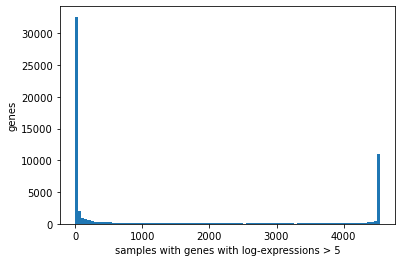

In [31]:
min_n_samples = int(exprs.shape[1]*min_frac_samples)
readcounts = exprs[exprs>=min_log_exprs].count(axis=1)
tmp = plt.hist(readcounts,bins = 100)
plt.xlabel("samples with genes with log-expressions > %s"%min_log_exprs)
plt.ylabel("genes")
genes = list(sorted(readcounts[readcounts>=min_n_samples].index.values))
print("genes with >= %s samples with log2-expression >=%s: %s"%(min_n_samples, min_log_exprs,len(genes)))

In [32]:
exprs = exprs.loc[genes,samples_with_exprs]
exprs.to_csv("PanCan/PanCan_5K.log2_exprs.tsv",sep ="\t")

# Z-scores

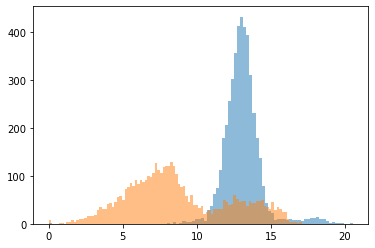

In [58]:
tmp = plt.hist(exprs.loc['ERBB2',:],bins =100, alpha = 0.5)
tmp = plt.hist(exprs.loc['ESR1',:],bins =100, alpha = 0.5)

Series([], dtype: float64)


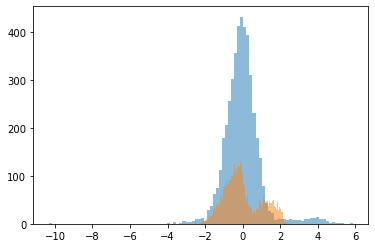

In [82]:
exprs_z = zscore(exprs)
s = exprs.std(axis=1)
print(s[s<=0])
tmp = plt.hist(exprs_z.loc['ERBB2',:],bins = 100, alpha = 0.5)
tmp = plt.hist(exprs_z.loc['ESR1',:],bins = 100, alpha = 0.5)

In [84]:
exprs_z.to_csv("PanCan/PanCan_5K.exprs_z.tsv",sep ="\t")

In [95]:
exprs_z.shape

(26060, 4538)

### to remove the effect of tissue, expressions are z-score transformed in each 

In [67]:
cancer_types = list(sorted(set(anno_pancan["cancer_type"].values)))
#cancer_types = ['OV', 'BRCA', 'COAD', 'KIRC', 'LUAD', 'LUSC', 'PAAD', 'PRAD', 'READ', 'STAD']
exprs_z = []
for ct in cancer_types:
    ct_samples = anno_pancan.loc[anno_pancan["cancer_type"]==ct,:].index.values
    e = exprs.loc[:,ct_samples]
    e = zscore(e)
    e.to_csv("PanCan/"+ct+".exprs_z.tsv",sep ="\t")
    anno_pancan.loc[ct_samples,:].to_csv("PanCan/"+ct+".annotation.tsv",sep ="\t")
    exprs_z.append(e)
    print(ct, e.shape[1])

OV 427
BRCA 1098
COAD 288
KIRC 531
LUAD 515
LUSC 498
PAAD 179
PRAD 496
READ 92
STAD 414


In [70]:
# overwrite expressions
#exprs = 0
exprs_z = 0
exprs_z = pd.concat(exprs_z,axis=1)
exprs_z.to_csv("PanCan/PanCan_5K.exprs_z_per_cancer.tsv",sep ="\t")
exprs_z.head(3)

,TCGA-04-1331-01,TCGA-04-1332-01,TCGA-04-1337-01,TCGA-04-1338-01,TCGA-04-1341-01,TCGA-04-1343-01,TCGA-04-1347-01,TCGA-04-1348-01,TCGA-04-1350-01,TCGA-04-1356-01,...,TCGA-VQ-AA6A-01,TCGA-VQ-AA6B-01,TCGA-VQ-AA6D-01,TCGA-VQ-AA6F-01,TCGA-VQ-AA6G-01,TCGA-VQ-AA6I-01,TCGA-VQ-AA6J-01,TCGA-VQ-AA6K-01,TCGA-ZA-A8F6-01,TCGA-ZQ-A9CR-01
sample,,,,,,,,,,,,,,,,,,,,,
A1BG,1.256960,-0.027531,0.536462,0.411498,1.578558,1.563351,0.960355,-0.294144,0.962185,1.758365,...,-0.993770,-0.909262,0.417788,-0.559259,-1.033999,-0.047649,-0.130175,-0.082882,0.236626,1.060767
A1BG-AS1,1.704973,-0.079482,1.221476,0.941792,0.828596,1.408565,0.340233,-0.214497,0.260562,1.368502,...,-0.839099,-1.237929,0.234931,-0.047203,-1.338816,0.178417,0.247683,-0.040914,0.251177,0.354422
A1CF,0.163108,0.527139,-0.082195,0.788442,0.069859,-0.675426,-0.675426,-0.675426,-0.675426,0.726276,...,-0.562880,1.183127,0.650732,-0.110529,1.544440,-1.333131,0.467318,0.492417,0.842100,0.170441


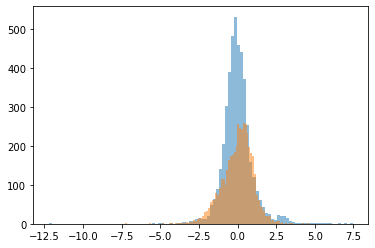

In [73]:
tmp = plt.hist(exprs_z.loc['ERBB2',:],bins = 100, alpha = 0.5)
tmp = plt.hist(exprs_z.loc['ESR1',:],bins = 100, alpha = 0.5)

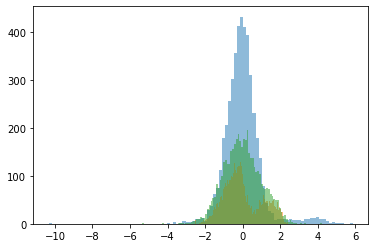

In [79]:
e = exprs.loc[['ERBB2',"ESR1","EBF1"],:]
e = zscore(e)
tmp = plt.hist(e.loc['ERBB2',:],bins = 100, alpha = 0.5)
tmp = plt.hist(e.loc['ESR1',:],bins = 100, alpha = 0.5)



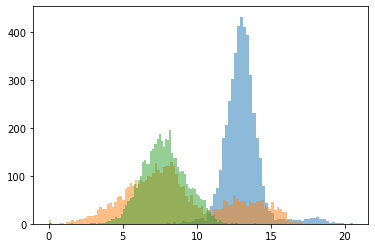

In [80]:
e = exprs.loc[['ERBB2',"ESR1","EBF1"],:]
tmp = plt.hist(e.loc['ERBB2',:],bins = 100, alpha = 0.5)
tmp = plt.hist(e.loc['ESR1',:],bins = 100, alpha = 0.5)
tmp = plt.hist(e.loc['EBF1',:],bins = 100, alpha = 0.5)

In [72]:
exprs_z.min().min(), exprs_z.max().max()

(-18.351198160927282, 33.1059044695482)

In [30]:
exprs_z.shape

(28713, 4538)